---
author: "Yifei Wu"
format: 
  html:
    include-in-header: HD.html
    toc: true
    code-fold: true
    code-tools: true
    number-sections: true
    fig-align : center
    fontsize : large
    mainfont: Source Sans Pro, Helvetica Neue, Helvetica, Arial, sans-serif;
--- 

# Introduction

In this model, we will use one classification method  called Decision Tree to compare the result of the matches between two team. We can easily seperate the winner and loser of every matches. Through the Decision Tree , it can satisfy my need to seperate the data of results fo the history matches. 

# Theory

Decision tree is a classification method which continuously  asks “whether or not questions” to the input so that it can gradually divides it into different parts. Decision trees are commonly used in operation research and operation management. A decision tree should be paralleled by a probability model as a best choice model or online selection model algorithm. Another use of decision trees is as a descriptive means for calculating conditional probabilities.

Decision trees are commonly used in operations research and operations management. If, in practice, decisions have to be taken online with no recall under incomplete knowledge, a decision tree should be paralleled by a probability model as a best choice model or online selection model algorithm.[citation needed] Another use of decision trees is as a descriptive means for calculating conditional probabilities.

# Class Distribution

In [7]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#Read the data
df=pd.read_csv("../../data/01-modified-data/WC cleaned data.csv")
df=df.drop(columns='Unnamed: 0')
#Show the data 
df

,neutral,rank_x,weighted_points_x,rank_y,weighted_points_y,weighted_diff,rank_diff,label
0,1,153.750000,145.775000,183.000000,64.912500,80.862500,-29.250000,1
1,0,160.000000,118.680000,183.000000,64.912500,53.767500,-23.000000,1
2,0,160.000000,118.680000,173.000000,92.050000,26.630000,-13.000000,1
3,1,199.000000,15.177500,173.000000,92.050000,-76.872500,26.000000,0
4,1,188.500000,35.850000,173.000000,92.050000,-56.200000,15.500000,0
...,...,...,...,...,...,...,...,...
3686,0,171.666667,82.538333,162.000000,79.978333,2.560000,9.666667,1
3687,0,125.500000,193.713333,162.000000,79.978333,113.735000,-36.500000,1
3688,0,171.666667,82.538333,190.333333,41.820000,40.718333,-18.666667,1
3689,0,125.500000,193.713333,190.333333,41.820000,151.893333,-64.833333,1


Text(0, 0.5, 'Count')

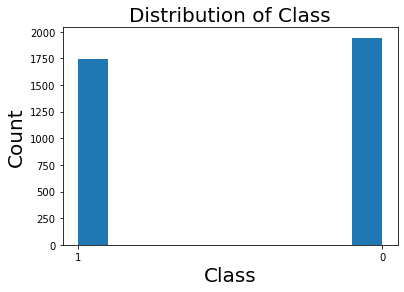

In [4]:
#Make a plot of the distribution 
FS=20
plt.hist(df.label.astype('string'))
plt.title('Distribution of Class',fontsize=FS)
plt.xlabel('Class',fontsize=FS)
plt.ylabel('Count',fontsize=FS)

Two counts are almost the same, with this, we won't meet issues from imbalanced data.However, there still exist a bit of difference between those two, so the imbalance still gonna exist.

# Baseline Model for Comparsion

In [5]:
# Define a Baseline Model
def random_classifier(y_data):
    ypred=[];
    max_label=np.max(y_data); #print(max_label)
    for i in range(0,len(y_data)):
        ypred.append(int(np.floor((max_label+1)*np.random.uniform(0,1))))

    print("-----RANDOM CLASSIFIER-----")
    print("accuracy",accuracy_score(y_data, ypred))
    print("percision, recall, fscore,",precision_recall_fscore_support(y_data, ypred))

random_classifier(df.label)

-----RANDOM CLASSIFIER-----
accuracy 0.5014901110810078
percision, recall, fscore, (array([0.52819957, 0.47482404]), array([0.50102881, 0.50200343]), array([0.51425554, 0.48803561]), array([1944, 1747]))


According to the data we can the metric is around 50%, if the model peform better than this, than it's bettter.

# Feature Selection

In [6]:

#Drop the column we don't need
X=df.drop(columns=['label'],axis=1)
y=df['label']
#split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
df

,neutral,rank_x,weighted_points_x,rank_y,weighted_points_y,weighted_diff,rank_diff,label
0,1,153.750000,145.775000,183.000000,64.912500,80.862500,-29.250000,1
1,0,160.000000,118.680000,183.000000,64.912500,53.767500,-23.000000,1
2,0,160.000000,118.680000,173.000000,92.050000,26.630000,-13.000000,1
3,1,199.000000,15.177500,173.000000,92.050000,-76.872500,26.000000,0
4,1,188.500000,35.850000,173.000000,92.050000,-56.200000,15.500000,0
...,...,...,...,...,...,...,...,...
3686,0,171.666667,82.538333,162.000000,79.978333,2.560000,9.666667,1
3687,0,125.500000,193.713333,162.000000,79.978333,113.735000,-36.500000,1
3688,0,171.666667,82.538333,190.333333,41.820000,40.718333,-18.666667,1
3689,0,125.500000,193.713333,190.333333,41.820000,151.893333,-64.833333,1


# Model Tuning

In [13]:

#LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results=[]
train_results=[]

for num_layer in range(1,20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train,y_train)

    yp_train=model.predict(x_train)
    yp_test=model.predict(x_test)

    # print(y_pred.shape)
    test_results.append([num_layer,accuracy_score(y_test, yp_test),recall_score(y_test, yp_test,pos_label=0),recall_score(y_test, yp_test,pos_label=1)])
    train_results.append([num_layer,accuracy_score(y_train, yp_train),recall_score(y_train, yp_train,pos_label=0),recall_score(y_train, yp_train,pos_label=1)])

In [15]:

test_results = np.array(test_results)
train_results = np.array(train_results)

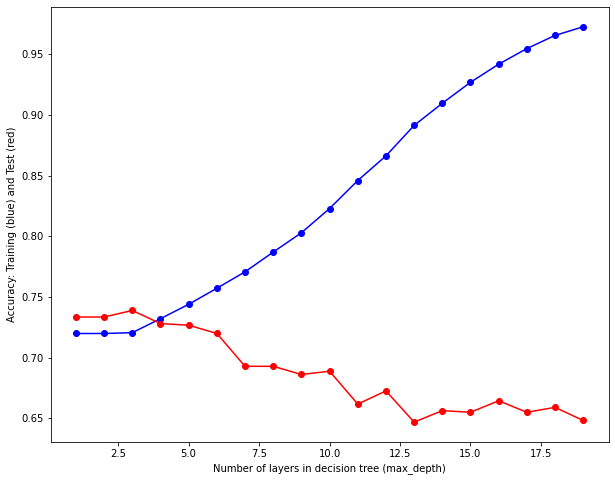

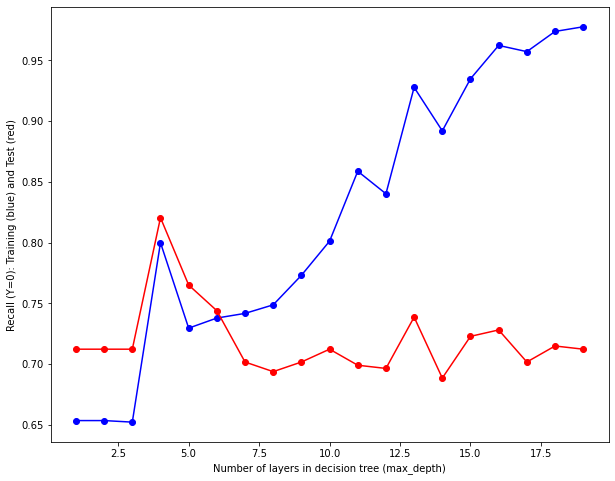

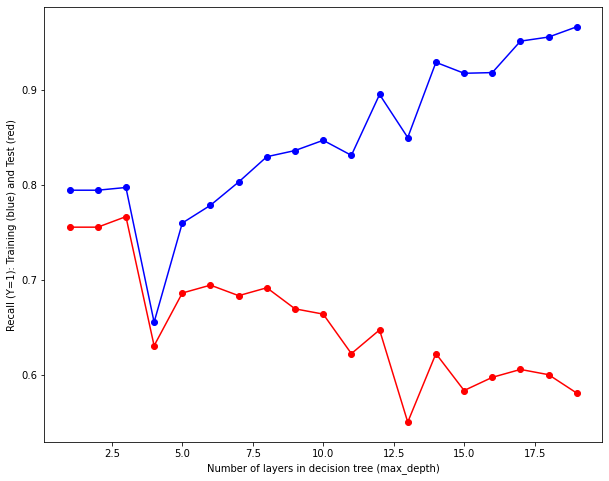

In [16]:

#Make a plot for different layer
fig1,ax1=plt.subplots(figsize=(10,8))
ax1.plot(range(1,20),train_results[:,1], c="b", marker='o' )
ax1.plot(range(1,20),test_results[:,1], c="r", marker='o' )
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("Accuracy: Training (blue) and Test (red)")
plt.show()

fig1,ax2=plt.subplots(figsize=(10,8))

ax2.plot(range(1,20),train_results[:,2], c="b", marker='o' )
ax2.plot(range(1,20),test_results[:,2], c="r", marker='o' )
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("Recall (Y=0): Training (blue) and Test (red)")
plt.show()

fig1,ax3=plt.subplots(figsize=(10,8))

ax3.plot(range(1,20),train_results[:,3], c="b", marker='o' )
ax3.plot(range(1,20),test_results[:,3], c="r", marker='o' )
plt.xlabel("Number of layers in decision tree (max_depth)")
plt.ylabel("Recall (Y=1): Training (blue) and Test (red)")
plt.show()

Conclusion:According to the three digram shows above that we can find the most suitable number of layers are 4, so we set teh max_depth to 4

# Final result: Confusion & Tree model

ACCURACY: 0.6928281461434371
NEGATIVE RECALL (Y=0): 0.7347931873479319
NEGATIVE PRECISION (Y=0): 0.719047619047619
POSITIVE RECALL (Y=1): 0.6402439024390244
POSITIVE PRECISION (Y=1): 0.658307210031348



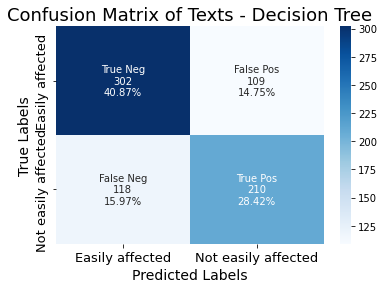

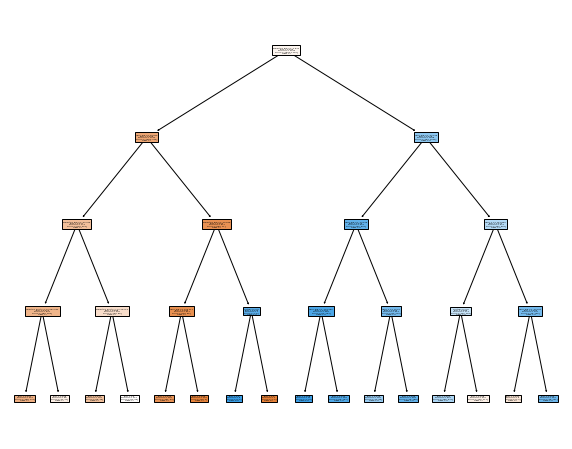

In [ ]:
#fit the tree model with the best layer
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(x_train,y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

#The confusion matrix
def confusion_plot(y_data,y_pred):
    print(
        "ACCURACY: "+str(accuracy_score(y_data,y_pred))+"\n"+
        "NEGATIVE RECALL (Y=0): "+str(recall_score(y_data,y_pred,pos_label=0))+"\n"+
        "NEGATIVE PRECISION (Y=0): "+str(precision_score(y_data,y_pred,pos_label=0))+"\n"+
        "POSITIVE RECALL (Y=1): "+str(recall_score(y_data,y_pred,pos_label=1))+"\n"+
        "POSITIVE PRECISION (Y=1): "+str(precision_score(y_data,y_pred,pos_label=1))+"\n"
    )
    cf=confusion_matrix(y_data, y_pred)
    # customize
    group_names = ["True Neg","False Pos","False Neg","True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #plot the heatmap
    fig=sns.heatmap(cf, annot=labels, fmt="", cmap='Blues')
    plt.title("Confusion Matrix of Texts - Decision Tree",fontsize=18)
    fig.set_xticklabels(["Easily affected","Not easily affected"],fontsize=13)
    fig.set_yticklabels(["Easily affected","Not easily affected"],fontsize=13)
    fig.set_xlabel("Predicted Labels",fontsize=14)
    fig.set_ylabel("True Labels",fontsize=14)
    plt.show()
confusion_plot(y_test,yp_test)

#Visualize the tree digram
def plot_tree(model,X,Y):
    fig = plt.figure(figsize=(10,8))
    tree_vis= tree.plot_tree(model, feature_names=X.columns,class_names=Y.name,filled=True)
plot_tree(model,x_test,y_test)

# Conclusion

This model is pertty good, but it can still to be improved. It's can distinguish most of the data at about 60% ACCURACY. As the false negative is a bit higher than the false positive which is a litle unaccetable, so i still need to purify the data and improve the model. 

I think decision tree is not suitable for this model, I think I will use the bootstrap next time which is also the model I learn from my case study.I think bootstrap is more stable and reliable for this dataset. So i may consider to apply this model next time.